<a href="https://colab.research.google.com/github/vlopezma/SyS_25-1/blob/main/Taller_Laplace/Taller_Laplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 9.2 MB/s eta 0:00:00


# Transformada de Laplace - Taller SyS

Valeria López Marín - 1002653352



---

###  Demuestre si los siguientes sistemas de la forma $y = \mathcal{H}\{x\}$ son sistemas lineales e invariantes en el tiempo (SLIT)  
*(simule los sistemas en Python):*

- $y[n] = x[n]/3 + 2x[n-1] - y[n-1]$
- $y[n] = \sum_{k=-\infty}^{n} x^2[k]$
- $y[n] = \text{median}(x[n])$, donde *median* es la función mediana sobre una ventana de tamaño 3.
- $y(t) = A x(t) + B$, donde $A, B \in \mathbb{R}$.

---

 Para verificar si un sistema es SLIT (Sistema Lineal e Invariante en el Tiempo), debe cumplir con dos propiedades fundamentales:

1. **Linealidad**: El sistema debe cumplir el principio de superposición:
   $ H[a · x1 + b · x2] = a · H{x1} + b · H{x2} $, para cualquier a, b constantes.

2. **Invariancia en el tiempo**: Si se aplica una entrada desplazada $ x(t - t0)$, la salida también debe desplazarse en el tiempo:
   $x(t - t0) ➞ y(t - t0)$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Sistema 1:
# y[n] = x[n]/3 + 2x[n-1] - y[n-1]
# -------------------------

def sistema1(x):
    y = np.zeros_like(x, dtype=float)
    for n in range(1, len(x)):
        y[n] = (1/3)*x[n] + 2*x[n-1] - y[n-1]
    return y

# Prueba de linealidad
x1 = np.array([1, 2, 0, 0, 0], dtype=float)
x2 = np.array([0, 1, 0, 1, 0], dtype=float)
a, b = 2, -1

y1 = sistema1(a * x1 + b * x2)
y2 = a * sistema1(x1) + b * sistema1(x2)

print("Sistema 1 - ¿Es lineal?:", np.allclose(y1, y2))

# Prueba de invarianza en el tiempo
x = np.array([0, 1, 2, 0, 0], dtype=float)
delay = 1
x_delayed = np.roll(x, delay)
x_delayed[:delay] = 0  # rellenamos con ceros

y = sistema1(x)
y_expected = np.roll(y, delay)
y_expected[:delay] = 0

y_delayed = sistema1(x_delayed)
print("Sistema 1 - ¿Es invariante en el tiempo?:", np.allclose(y_expected, y_delayed))



Sistema 1 - ¿Es lineal?: True
Sistema 1 - ¿Es invariante en el tiempo?: True


In [ ]:
# -------------------------
# Sistema 2:
# y[n] = suma x^2[k]
# -------------------------

def sistema2(x):
    y = np.zeros_like(x, dtype=float)
    for n in range(len(x)):
        y[n] = np.sum(x[:n+1]**2)
    return y

y1 = sistema2(a * x1 + b * x2)
y2 = a * sistema2(x1) + b * sistema2(x2)
print("Sistema 2 - ¿Es lineal?:", np.allclose(y1, y2))

# Prueba de invarianza en el tiempo
x = np.array([0, 1, 2, 0, 0], dtype=float)
x_delayed = np.roll(x, delay)
x_delayed[:delay] = 0

y = sistema2(x)
y_expected = np.roll(y, delay)
y_expected[:delay] = 0

y_delayed = sistema2(x_delayed)
print("Sistema 2 - ¿Es invariante en el tiempo?:", np.allclose(y_expected, y_delayed))




Sistema 2 - ¿Es lineal?: False
Sistema 2 - ¿Es invariante en el tiempo?: True


In [ ]:
# -------------------------
# Sistema 3:
# y[n] = mediana(x[n]) sobre ventana de tamaño 3
# -------------------------

def sistema3(x):
    y = np.zeros_like(x, dtype=float)
    x_padded = np.pad(x, (1, 1), mode='edge')  # relleno con el valor de borde
    for n in range(len(x)):
        ventana = x_padded[n:n+3]
        y[n] = np.median(ventana)
    return y

y1 = sistema3(a * x1 + b * x2)
y2 = a * sistema3(x1) + b * sistema3(x2)
print("Sistema 3 - ¿Es lineal?:", np.allclose(y1, y2))

# Prueba de invarianza en el tiempo
x = np.array([0, 1, 2, 0, 0], dtype=float)
x_delayed = np.roll(x, delay)
x_delayed[:delay] = 0

y = sistema3(x)
y_expected = np.roll(y, delay)
y_expected[:delay] = 0

y_delayed = sistema3(x_delayed)
print("Sistema 3 - ¿Es invariante en el tiempo?:", np.allclose(y_expected, y_delayed))

Sistema 3 - ¿Es lineal?: False
Sistema 3 - ¿Es invariante en el tiempo?: True


In [ ]:
# -------------------------
# Sistema 4:
# y(t) = A*x(t) + B
# -------------------------

A, B = 2, 3

def sistema4(x):
    return A * x + B

y1 = sistema4(a * x1 + b * x2)
y2 = a * sistema4(x1) + b * sistema4(x2)
print("Sistema 4 - ¿Es lineal?:", np.allclose(y1, y2))

# Prueba de invarianza en el tiempo
x = np.array([0, 1, 2, 0, 0], dtype=float)
x_delayed = np.roll(x, delay)
x_delayed[:delay] = 0

y = sistema4(x)
y_expected = np.roll(y, delay)
y_expected[:delay] = 0

y_delayed = sistema4(x_delayed)
print("Sistema 4 - ¿Es invariante en el tiempo?:", np.allclose(y_expected, y_delayed))

Sistema 4 - ¿Es lineal?: True
Sistema 4 - ¿Es invariante en el tiempo?: False


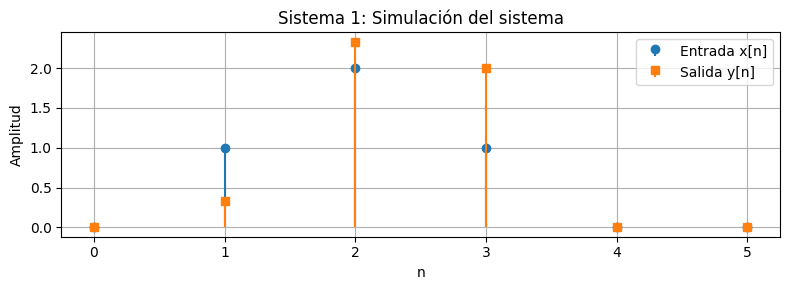

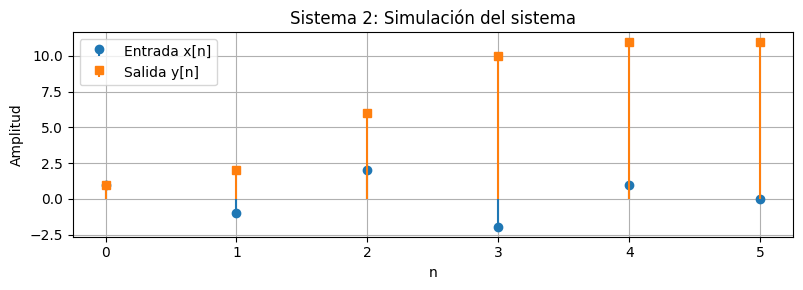

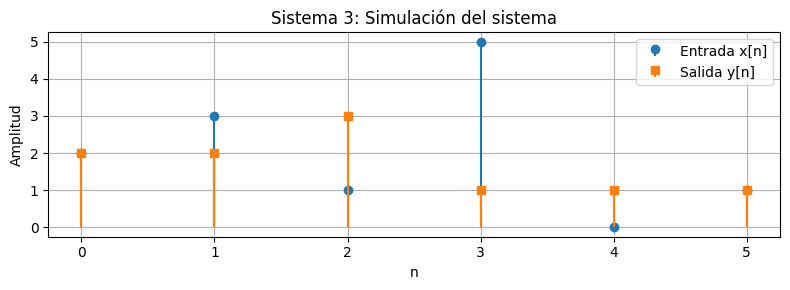

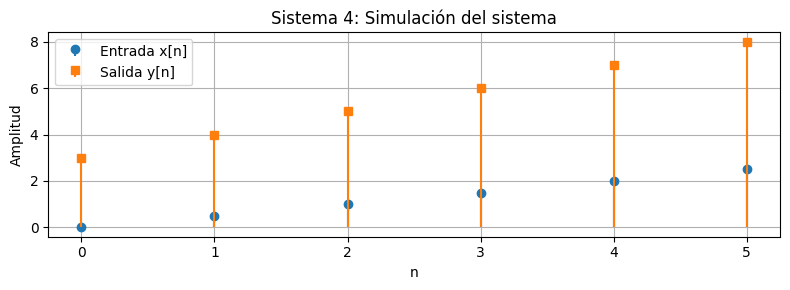

In [ ]:
# -------------------------
# Simulación visual de los sistemas
# -------------------------

entradas = {
    'Sistema 1': np.array([0, 1, 2, 1, 0, 0], dtype=float),
    'Sistema 2': np.array([1, -1, 2, -2, 1, 0], dtype=float),
    'Sistema 3': np.array([2, 3, 1, 5, 0, 1], dtype=float),
    'Sistema 4': np.array([0, 0.5, 1, 1.5, 2, 2.5], dtype=float)
}

sistemas = {
    'Sistema 1': sistema1,
    'Sistema 2': sistema2,
    'Sistema 3': sistema3,
    'Sistema 4': sistema4
}

for nombre, x in entradas.items():
    y = sistemas[nombre](x)
    plt.figure(figsize=(8, 3))
    plt.stem(x, basefmt=" ", linefmt='C0-', markerfmt='C0o', label='Entrada x[n]')
    plt.stem(y, basefmt=" ", linefmt='C1-', markerfmt='C1s', label='Salida y[n]')
    plt.title(f"{nombre}: Simulación del sistema")
    plt.xlabel("n")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


---

###  Hallar la salida $y[n]$ de un SLIT ante la entrada  

$x[n] = \{-15,\ 5,\ -3^{\dagger},\ 0,\ 5,\ 7,\ -1\}$,  

con respuesta al impulso  

$h[n] = \{1,\ -2,\ 0,\ 1,\ -2,\ 4\}$,  

donde $n \in \{0,\ \pm 1,\ \pm 2,\ \ldots\}$ y  

$x[n] = 0$ para $x[n'] \notin x[n]$.

> **Nota**: Utilizar método gráfico para encontrar la salida y comprobar con simulación en Python.  
> Ver cuaderno *Convolución discreta*.  
> Repetir el proceso para el sistema con **respuesta al escalón**.


In [ ]:
# 🔹 Convolución con respuesta al impulso (h[n] dado directamente)

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Señales dadas
x = np.array([-15, 5, -3, 0, 5, 7, -1]).reshape(-1, 1)
h = np.array([1, -2, 0, 1, -2, 4]).reshape(-1, 1)  # respuesta al impulso directamente

# Función de convolución paso a paso
def convgraf(h, x):
    lx = len(x)
    lh = len(h)
    M = 2 * lx + lh
    xm = np.zeros((M, M))
    hm = np.r_[np.zeros((lx, 1)), h, np.zeros((lx, 1))]
    ym = np.zeros((M, M))
    for i in range(M - lx + 1):
        xm[i:i + lx, i] = np.flip(x).reshape(-1)
        ym[i, i] = xm[:, i].T.dot(hm)
    return xm, ym, hm

# Función de visualización gráfica
def plot_conv(k, xm, ym, hm):
    plt.figure(figsize=(10, 4))
    plt.stem(xm[:, k], markerfmt='+', linefmt='b-', basefmt=" ", label='$x[k]$')
    plt.stem(hm, linefmt='g-', markerfmt='o', basefmt=" ", label='$h[n-k]$')
    plt.stem(ym[:k, :].sum(axis=0), linefmt='r-', markerfmt='s', basefmt=" ", label='$y[n] = x * h$')
    plt.title(f'Convolución paso a paso: $y[n] = x[k] * h[n-k]$ (n = {k})')
    plt.xlabel('n')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Ejecutar
xm, ym, hm = convgraf(h, x)

@interact(k=(0, xm.shape[0] - len(x), 1))
def show_frame(k=0):
    plot_conv(k, xm, ym, hm)


/tmp/ipython-input-9-1827797577.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i, i] = xm[:, i].T.dot(hm)


interactive(children=(IntSlider(value=0, description='k', max=13), Output()), _dom_classes=('widget-interact',…

In [ ]:
# 🔸 Convolución con respuesta al escalón (requiere derivar h[n] con np.diff)

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Señales dadas
x = np.array([-15, 5, -3, 0, 5, 7, -1]).reshape(-1, 1)
h_e = np.array([-1, 6, -10, 3, 1, -10, 2, 5])  # respuesta al escalón
h = np.diff(h_e).reshape(-1, 1)               # derivada discreta → respuesta al impulso

# Función de convolución paso a paso
def convgraf(h, x):
    lx = len(x)
    lh = len(h)
    M = 2 * lx + lh
    xm = np.zeros((M, M))
    hm = np.r_[np.zeros((lx, 1)), h, np.zeros((lx, 1))]
    ym = np.zeros((M, M))
    for i in range(M - lx + 1):
        xm[i:i + lx, i] = np.flip(x).reshape(-1)
        ym[i, i] = xm[:, i].T.dot(hm)
    return xm, ym, hm

# Función de visualización gráfica
def plot_conv(k, xm, ym, hm):
    plt.figure(figsize=(10, 4))
    plt.stem(xm[:, k], markerfmt='+', linefmt='b-', basefmt=" ", label='$x[k]$')
    plt.stem(hm, linefmt='g-', markerfmt='o', basefmt=" ", label='$h[n-k]$')
    plt.stem(ym[:k, :].sum(axis=0), linefmt='r-', markerfmt='s', basefmt=" ", label='$y[n] = x * h$')
    plt.title(f'Convolución desde escalón: $y[n] = x[k] * h[n-k]$ (n = {k})')
    plt.xlabel('n')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Ejecutar
xm, ym, hm = convgraf(h, x)

@interact(k=(0, xm.shape[0] - len(x), 1))
def show_frame(k=0):
    plot_conv(k, xm, ym, hm)


/tmp/ipython-input-10-2710553348.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i, i] = xm[:, i].T.dot(hm)


interactive(children=(IntSlider(value=0, description='k', max=14), Output()), _dom_classes=('widget-interact',…

### Composición de sistemas lineales — Serie de dos sistemas

Sea la señal Gaussiana $x(t) = e^{-at^2}$ con $a \in \mathbb{R}^+$, el sistema $A$ con relación entrada-salida $y_A(t) = x^2(t)$, y el sistema lineal e invariante en el tiempo $B$ con respuesta al impulso $h_B(t) = Be^{-bt^2}$:

**a)** Encuentre la salida del sistema en serie  
$x(t) \rightarrow h_B(t) \rightarrow y_A(t) \rightarrow y(t)$

**b)** Encuentre la salida del sistema en serie  
$x(t) \rightarrow y_A(t) \rightarrow h_B(t) \rightarrow y(t)$
\





### ✨ Punto a) — Composición: $x(t) \rightarrow h_B(t) \rightarrow y_A(t) \rightarrow y(t)$

**Datos:**

- $x(t) = e^{-at^2}$ (señal Gaussiana)
- $h_B(t) = B e^{-bt^2}$ (respuesta al impulso del sistema $B$)
- $y_A(t) = x^2(t)$ (salida del sistema $A$)

---

#### 🔹 Paso 1: Aplicar $x(t)$ al sistema $B$ (convolución)

Como $B$ es un SLIT, su salida es:

$$
x_1(t) = (x * h_B)(t) = \int_{-\infty}^{\infty} e^{-a\tau^2} \cdot B e^{-b(t - \tau)^2} \, d\tau
$$

Esto es la **convolución de dos Gaussianas**, cuyo resultado también es una Gaussiana:

$$
x_1(t) = B \sqrt{\frac{\pi}{a + b}} \cdot e^{-\frac{ab}{a + b} t^2}
$$

---

#### 🔹 Paso 2: Pasar $x_1(t)$ por el sistema $A$ (cuadrado)

El sistema $A$ aplica:

$$
y(t) = y_A(t) = \left( x_1(t) \right)^2
$$

Sustituyendo:

$$
y(t) = \left( B \sqrt{\frac{\pi}{a + b}} \cdot e^{-\frac{ab}{a + b} t^2} \right)^2
= B^2 \cdot \frac{\pi}{a + b} \cdot e^{-\frac{2ab}{a + b} t^2}
$$

---

#### ✅ **Resultado final del punto a)**:

$$
\boxed{
y(t) = B^2 \cdot \frac{\pi}{a + b} \cdot e^{-\frac{2ab}{a + b} t^2}
}
$$


### ✨ Punto b) — Composición: $x(t) \rightarrow y_A(t) \rightarrow h_B(t) \rightarrow y(t)$

**Datos:**

- $x(t) = e^{-at^2}$
- $y_A(t) = x^2(t) = e^{-2at^2}$
- $h_B(t) = B e^{-bt^2}$

---

#### 🔹 Paso 1: Aplicar sistema $A$ primero

$$
y_A(t) = x^2(t) = e^{-2at^2}
$$

---

#### 🔹 Paso 2: Aplicar sistema $B$ (convolución)

$$
y(t) = y_A(t) * h_B(t) = \int_{-\infty}^{\infty} e^{-2a\tau^2} \cdot B e^{-b(t - \tau)^2} \, d\tau
$$

Esto es una convolución de dos Gaussianas:

$$
y(t) = B \sqrt{\frac{\pi}{2a + b}} \cdot e^{-\frac{2ab}{2a + b} t^2}
$$

---

#### ✅ **Resultado final del punto b)**:

$$
\boxed{
y(t) = B \sqrt{\frac{\pi}{2a + b}} \cdot e^{-\frac{2ab}{2a + b} t^2}
}
$$


In [ ]:
import sympy as sp

# Variables simbólicas
t, tau, a, b, B = sp.symbols('t tau a b B', real=True, positive=True)

# Expandimos el exponente: (a + b)τ² - 2btτ + bt²
expo = (a + b)*tau**2 - 2*b*t*tau + b*t**2

# Armo la integral ya simplificada simbólicamente
integrando = B * sp.exp(-expo)
conv = sp.integrate(integrando, (tau, -sp.oo, sp.oo))

# Simplificación
conv_simplificada = sp.simplify(conv)

# Mostrar resultado
sp.init_printing(use_latex='mathjax')
display(sp.Eq(sp.Symbol('y(t)'), conv_simplificada))


                   2 
             -a⋅b⋅t  
             ────────
              a + b  
       √π⋅B⋅ℯ        
y(t) = ──────────────
           _______   
         ╲╱ a + b    

In [ ]:
import sympy as sp

# Definir variables simbólicas
t, tau, a, b, B = sp.symbols('t tau a b B', real=True, positive=True)

# Definir la salida de A: y_A(t) = x^2(t) = e^{-2a t^2}
yA_tau = sp.exp(-2 * a * tau**2)

# hB(t - τ) = B e^{-b(t - τ)^2}
hB_t_tau = B * sp.exp(-b * (t - tau)**2)

# Convolución simbólica
integrando_b = yA_tau * hB_t_tau
conv_b = sp.integrate(integrando_b, (tau, -sp.oo, sp.oo))

# Simplificar
conv_b_simplificada = sp.simplify(conv_b)

# Mostrar resultado
sp.init_printing(use_latex='mathjax')
display(sp.Eq(sp.Symbol('y(t)'), conv_b_simplificada))


                  2 ⎛  2⋅a      ⎞
             2⋅a⋅t ⋅⎜─────── - 1⎟
                    ⎝2⋅a + b    ⎠
       √π⋅B⋅ℯ                    
y(t) = ──────────────────────────
                _________        
              ╲╱ 2⋅a + b         

- Demuestre las siguientes propiedades (sin utilizar tablas de propiedades):

1. $$ \mathcal{L}\{x(t - t_0)\} = e^{-st_0} X(s) $$
2. $$ \mathcal{L}\{x(at)\} = \frac{1}{|a|} X\left(\frac{s}{a}\right) $$
3. $$ \mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = sX(s) $$
4. $$ \mathcal{L}\{x(t) * y(t)\} = X(s)Y(s) $$

Ver material de apoyo y propiedades de Laplace.


### Propiedad (i) - Desplazamiento en el tiempo

Demostrar:

$$
\mathcal{L}\{x(t - t_0)\} = e^{-st_0} X(s)
$$

**Demostración**:

Partimos de la definición de la transformada de Laplace:

$$
\mathcal{L}\{x(t - t_0)\} = \int_0^{\infty} x(t - t_0) e^{-st} dt
$$

Hacemos el cambio de variable:

$$
\tau = t - t_0 \quad \Rightarrow \quad t = \tau + t_0 \quad \Rightarrow \quad dt = d\tau
$$

Cuando $t = 0$, entonces $\tau = -t_0$  
Cuando $t = \infty$, entonces $\tau = \infty$

Sustituimos en la integral:

$$
\int_0^{\infty} x(t - t_0) e^{-st} dt = \int_{-t_0}^{\infty} x(\tau) e^{-s(\tau + t_0)} d\tau
$$

Factorizamos:

$$
= e^{-st_0} \int_{-t_0}^{\infty} x(\tau) e^{-s\tau} d\tau
$$

Si $x(\tau)$ está definida solo para $\tau \geq 0$, entonces el integrando es cero cuando $\tau < 0$, por lo tanto:

$$
\int_{-t_0}^{\infty} x(\tau) e^{-s\tau} d\tau = \int_0^{\infty} x(\tau) e^{-s\tau} d\tau = X(s)
$$

Entonces:

$$
\mathcal{L}\{x(t - t_0)\} = e^{-st_0} X(s)
$$



### Propiedad (ii) - Escalamiento en el tiempo

Demostrar:

$$
\mathcal{L}\{x(at)\} = \frac{1}{|a|} X\left( \frac{s}{a} \right)
$$

**Demostración**:

Usamos la definición de la transformada de Laplace:

$$
\mathcal{L}\{x(at)\} = \int_0^{\infty} x(at) e^{-st} dt
$$

Hacemos el cambio de variable:

$$
\tau = at \quad \Rightarrow \quad t = \frac{\tau}{a} \quad \Rightarrow \quad dt = \frac{1}{a} d\tau
$$

Cambiamos los límites:

- Si $a > 0$, entonces cuando $t = 0$, $\tau = 0$ y cuando $t = \infty$, $\tau = \infty$
- Si $a < 0$, entonces cuando $t = 0$, $\tau = 0$ y cuando $t = \infty$, $\tau = -\infty$

Entonces, escribimos:

$$
\int_0^{\infty} x(at) e^{-st} dt = \int_{0}^{\infty} x(\tau) e^{-s \cdot \frac{\tau}{a}} \cdot \frac{1}{a} d\tau \quad \text{si } a > 0
$$

o

$$
\int_0^{\infty} x(at) e^{-st} dt = \int_{0}^{-\infty} x(\tau) e^{-s \cdot \frac{\tau}{a}} \cdot \frac{1}{a} d\tau \quad \text{si } a < 0
$$

Unificamos ambos casos con el valor absoluto:

$$
\mathcal{L}\{x(at)\} = \frac{1}{|a|} \int_0^{\infty} x(\tau) e^{-\frac{s}{a} \tau} d\tau = \frac{1}{|a|} X\left( \frac{s}{a} \right)
$$



### Propiedad (iii) - Derivada en el tiempo

Demostrar:

$$
\mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = sX(s) - x(0)
$$

**Demostración**:

Partimos de la definición:

$$
\mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = \int_0^{\infty} \frac{dx(t)}{dt} \cdot e^{-st} dt
$$

Usamos integración por partes:

Sea:

- $u = e^{-st} \quad \Rightarrow \quad \frac{du}{dt} = -s e^{-st}$
- $dv = \frac{dx(t)}{dt} dt \quad \Rightarrow \quad v = x(t)$

Entonces:

$$
\int_0^{\infty} \frac{dx(t)}{dt} \cdot e^{-st} dt = \left[ x(t) e^{-st} \right]_0^{\infty} - \int_0^{\infty} x(t) \cdot (-s e^{-st}) dt
$$

Evaluamos el primer término:

Si $x(t)$ tiene crecimiento limitado (es de orden exponencial), entonces:

$$
\lim_{t \to \infty} x(t) e^{-st} = 0 \quad \text{(para Re(s) suficientemente grande)}
$$

Por tanto:

$$
\left[ x(t) e^{-st} \right]_0^{\infty} = 0 - x(0)
$$

Y la integral se convierte en:

$$
- x(0) + s \int_0^{\infty} x(t) e^{-st} dt = - x(0) + s X(s)
$$

Por lo tanto:

$$
\mathcal{L}\left\{ \frac{dx(t)}{dt} \right\} = sX(s) - x(0)
$$



### Propiedad (iv) - Convolución

Demostrar:

$$
\mathcal{L}\{x(t) * y(t)\} = X(s) \cdot Y(s)
$$

**Demostración**:

La convolución entre dos funciones en el dominio del tiempo está definida como:

$$
(x * y)(t) = \int_0^t x(\tau) y(t - \tau) d\tau
$$

Entonces:

$$
\mathcal{L}\{x(t) * y(t)\} = \mathcal{L}\left\{ \int_0^t x(\tau) y(t - \tau) d\tau \right\}
$$

Usamos la definición de la Transformada de Laplace:

$$
\int_0^{\infty} \left( \int_0^t x(\tau) y(t - \tau) d\tau \right) e^{-st} dt
$$

Intercambiamos el orden de integración (válido por Fubini, si las funciones son de orden exponencial):

$$
= \int_0^{\infty} x(\tau) \left( \int_{\tau}^{\infty} y(t - \tau) e^{-st} dt \right) d\tau
$$

Hacemos el cambio de variable:

- Sea $u = t - \tau \quad \Rightarrow \quad t = u + \tau \quad \Rightarrow \quad dt = du$

Entonces, el límite inferior cuando $t = \tau$ es $u = 0$, y cuando $t = \infty$, $u = \infty$.

Sustituimos:

$$
= \int_0^{\infty} x(\tau) \left( \int_{0}^{\infty} y(u) e^{-s(u + \tau)} du \right) d\tau
$$

Separando términos:

$$
= \int_0^{\infty} x(\tau) e^{-s\tau} \left( \int_{0}^{\infty} y(u) e^{-su} du \right) d\tau
$$

Ahora separamos las integrales:

$$
= \left( \int_0^{\infty} x(\tau) e^{-s\tau} d\tau \right) \cdot \left( \int_0^{\infty} y(u) e^{-su} du \right)
$$

Por definición:

$$
= X(s) \cdot Y(s)
$$


### Transformada de Laplace, Polos, Ceros y ROC

- Encuentre la transformada de Laplace, dibuje el esquema de polos y ceros y la región de convergencia (ROC) de las siguientes señales:

1. $$ e^{-2t}u(t) + e^{-3t}u(t) $$

2. $$ e^{2t}u(t) + e^{-3t}u(-t) $$

3. $$ e^{-a|t|} $$

4. $$ e^{-2t} \left[ u(t) - u(t - 5) \right] $$


### Ejercicio 1: Transformada de Laplace, polos, ceros y ROC

**Señal:**

$$
x(t) = e^{-2t}u(t) + e^{-3t}u(t)
$$

---

#### 1. Transformada de Laplace

Sabemos que:

$$
\mathcal{L}\{e^{-at}u(t)\} = \frac{1}{s + a}, \quad \text{ROC: Re}(s) > -a
$$

Aplicando la propiedad lineal:

$$
\mathcal{L}\{x(t)\} = \mathcal{L}\{e^{-2t}u(t)\} + \mathcal{L}\{e^{-3t}u(t)\}
= \frac{1}{s + 2} + \frac{1}{s + 3}
$$

---

#### 2. Polos y ceros

La función:

$$
X(s) = \frac{1}{s + 2} + \frac{1}{s + 3}
$$

Es una suma de dos funciones racionales simples. Para encontrar polos y ceros, podemos escribirla como una fracción racional común:

$$
X(s) = \frac{(s + 3) + (s + 2)}{(s + 2)(s + 3)} = \frac{2s + 5}{(s + 2)(s + 3)}
$$

**Polos:** $s = -2$, $s = -3$  
**Ceros:** Se anula el numerador $2s + 5 = 0 \Rightarrow s = -\frac{5}{2}$

---

#### 3. Región de Convergencia (ROC)

Ambos términos tienen forma $e^{-at}u(t)$, lo que implica que son **causales**.

Por lo tanto, la **ROC es la intersección** de:

- $\text{Re}(s) > -2$
- $\text{Re}(s) > -3$

Resultado:

$$
\text{ROC} = \text{Re}(s) > -2
$$

---

#### Resumen:

- **Transformada:**
  $$
  X(s) = \frac{2s + 5}{(s + 2)(s + 3)}
  $$
- **Polos:** $s = -2$, $s = -3$
- **Ceros:** $s = -\frac{5}{2}$
- **ROC:** $\text{Re}(s) > -2$


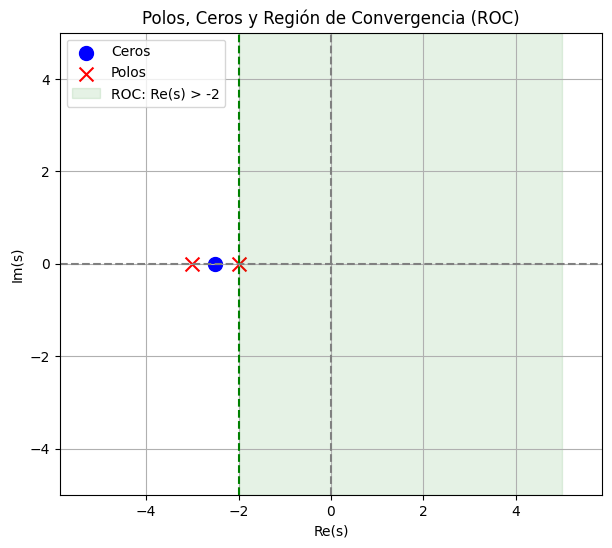

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Numerador y denominador
num = [2, 5]       # 2s + 5
den = [1, 5, 6]    # (s + 2)(s + 3)

# Polos y ceros
zeros, poles, gain = signal.tf2zpk(num, den)

# Crear figura
plt.figure(figsize=(7, 6))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Graficar ceros y polos
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', s=100, color='blue', label='Ceros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', s=100, color='red', label='Polos')

# ROC: Re(s) > -2
y_roc = np.linspace(-5, 5, 400)
plt.fill_betweenx(y_roc, -2, 5, color='green', alpha=0.1, label='ROC: Re(s) > -2')
plt.axvline(-2, color='green', linestyle='--')  # Borde de la ROC

# Gráfico
plt.title('Polos, Ceros y Región de Convergencia (ROC)')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()


### Ejercicio 2: Transformada de Laplace, polos, ceros y ROC

**Señal:**

$$
x(t) = e^{2t}u(t) + e^{-3t}u(-t)
$$

---

#### 1. Transformada de Laplace

Recordamos dos fórmulas clave:

- $ \mathcal{L}\{e^{at}u(t)\} = \frac{1}{s - a} $, ROC: $ \text{Re}(s) > a $
- $ \mathcal{L}\{e^{at}u(-t)\} = \frac{1}{s - a} $, ROC: $ \text{Re}(s) < a $

Aplicamos a cada término:

- $ \mathcal{L}\{e^{2t}u(t)\} = \frac{1}{s - 2} $, con ROC: $ \text{Re}(s) > 2 $
- $ \mathcal{L}\{e^{-3t}u(-t)\} = \frac{1}{s + 3} $, con ROC: $ \text{Re}(s) < -3 $

---

#### 2. Suma de términos

La transformada de la señal completa sería:

$$
X(s) = \frac{1}{s - 2} + \frac{1}{s + 3}
$$

Pero **no hay intersección entre las dos ROCs**:

- Una requiere $ \text{Re}(s) > 2 $
- La otra $ \text{Re}(s) < -3 $

Esto implica que **no existe una única ROC** que permita sumar ambas transformadas.

---

#### 3. ¿Existe la transformada de Laplace?

❌ **No**, porque **no hay una región común de convergencia**.  
El conjunto de valores de $s$ para los cuales ambas integrales convergen simultáneamente es vacío.

---

#### 4. Polos y ceros

Aunque no existe la transformada de forma estricta, formalmente se pueden identificar:

- **Polos**: $ s = 2 $, $ s = -3 $
- **Ceros**: ninguno (si sumaras los términos formalmente)

---

#### 5. Conclusión

- La transformada **no existe** bajo la definición unilateral, ya que **no hay una ROC común**.
- Esta señal se podría tratar mediante la **transformada de Laplace bilateral**, que permite descomponer señales con partes causales y anticausales, pero **no es válida en este taller** si se trabaja solo con Laplace unilateral.


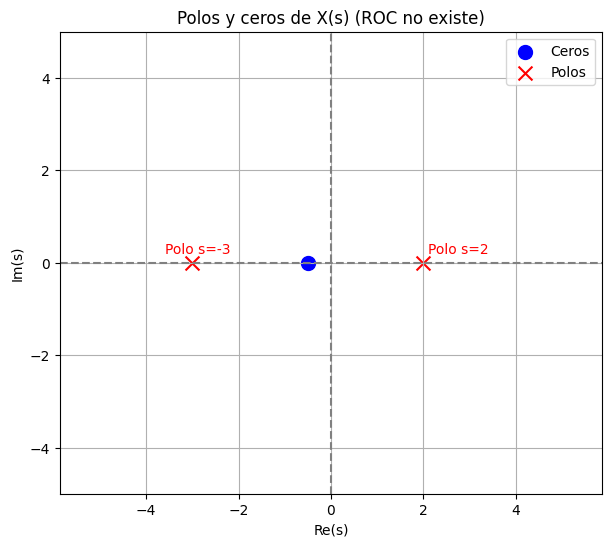

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definimos una expresión formal: X(s) = 1/(s - 2) + 1/(s + 3)
# Fracción común: (s + 3 + s - 2) / ((s - 2)(s + 3)) = (2s + 1)/(s^2 + s - 6)
num = [2, 1]       # 2s + 1
den = [1, 1, -6]   # s^2 + s - 6 = (s - 2)(s + 3)

# Obtener ceros, polos y ganancia
zeros, poles, gain = signal.tf2zpk(num, den)

# Crear figura
plt.figure(figsize=(7, 6))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Graficar ceros y polos
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', s=100, color='blue', label='Ceros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', s=100, color='red', label='Polos')

# Mostrar los polos s = 2 y s = -3
plt.text(2.1, 0.2, 'Polo s=2', color='red')
plt.text(-3.6, 0.2, 'Polo s=-3', color='red')

# No se representa ROC: no existe una común
plt.title('Polos y ceros de X(s) (ROC no existe)')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.xlim(-6, 6)
plt.ylim(-5, 5)
plt.show()


**Nota sobre la ROC:**

Aunque los polos están ubicados en $ s = 2 $ y $ s = -3 $, **no existe una región de convergencia común** para esta suma de transformadas.

- La primera parte $ e^{2t}u(t) $ requiere $ \text{Re}(s) > 2 $
- La segunda parte $ e^{-3t}u(-t) $ requiere $ \text{Re}(s) < -3 $

Como no hay intersección entre estas dos regiones, la **transformada de Laplace unilateral no existe** para esta señal.

✔️ El gráfico se incluye solo como referencia formal de los polos y ceros. La ROC está vacía bajo la definición unilateral.


### Ejercicio 3: Transformada de Laplace, polos, ceros y ROC

**Señal:**

$$
x(t) = e^{-a|t|}, \quad a > 0
$$

---

#### 1. Expresión por partes

Dado que la función depende del valor absoluto de $t$, la escribimos por tramos:

$$
x(t) =
\begin{cases}
e^{at}, & t < 0 \\
e^{-at}, & t \geq 0
\end{cases}
$$

Equivalente a:

$$
x(t) = e^{-a|t|} = e^{at}u(-t) + e^{-at}u(t)
$$

---

#### 2. Transformada de Laplace

Aplicamos la transformada a cada parte:

- $ \mathcal{L}\{e^{-at}u(t)\} = \frac{1}{s + a}, \quad \text{ROC: Re}(s) > -a $
- $ \mathcal{L}\{e^{at}u(-t)\} = \frac{1}{s - a}, \quad \text{ROC: Re}(s) < a $

Sumamos:

$$
\mathcal{L}\{x(t)\} = \frac{1}{s + a} + \frac{1}{s - a}
= \frac{(s - a) + (s + a)}{(s - a)(s + a)} = \frac{2s}{s^2 - a^2}
$$

---

#### 3. Polos y ceros

- **Polos:** $s = a$, $s = -a$
- **Cero:** $s = 0$

---

#### 4. Región de Convergencia (ROC)

Para que ambas transformadas converjan, se requiere:

- $ \text{Re}(s) > -a $ (por el término causal)
- $ \text{Re}(s) < a $ (por el término anticausal)

Entonces la ROC es:

$$
- a < \text{Re}(s) < a
$$

Esto es una **franja vertical** en el plano complejo.

---

#### 5. Conclusión

- **Transformada:**
  $$
  X(s) = \frac{2s}{s^2 - a^2}
  $$

- **Polos:** $ s = \pm a $
- **Cero:** $ s = 0 $
- **ROC:** $ -a < \text{Re}(s) < a $ → franja vertical

Se trata de una señal **de energía finita**, por lo que su transformada bilateral converge en una franja finita.


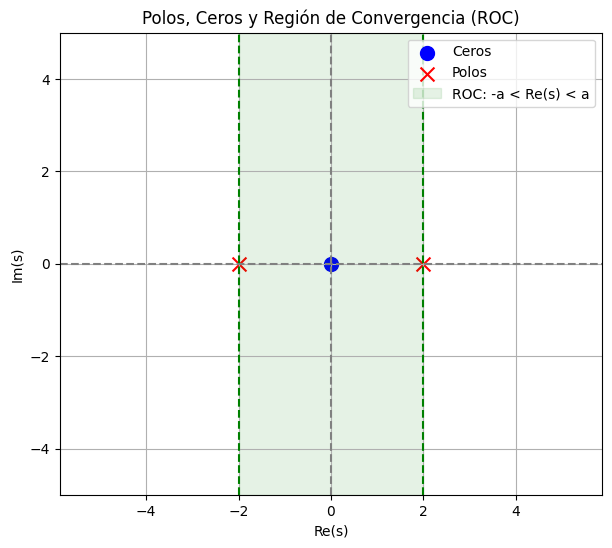

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetro a
a = 2

# Numerador y denominador de X(s) = 2s / (s^2 - a^2)
num = [2, 0]              # 2s
den = [1, 0, -a**2]       # s^2 - a^2

# Obtener ceros, polos y ganancia
zeros, poles, gain = signal.tf2zpk(num, den)

# Crear figura
plt.figure(figsize=(7, 6))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Graficar ceros y polos
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', s=100, color='blue', label='Ceros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', s=100, color='red', label='Polos')

# ROC: -a < Re(s) < a
y_roc = np.linspace(-5, 5, 400)
plt.fill_betweenx(y_roc, -a, a, color='green', alpha=0.1, label='ROC: -a < Re(s) < a')
plt.axvline(-a, color='green', linestyle='--')
plt.axvline(a, color='green', linestyle='--')

# Anotaciones
plt.title('Polos, Ceros y Región de Convergencia (ROC)')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()


### Ejercicio 4: Transformada de Laplace, polos, ceros y ROC

**Señal:**

$$
x(t) = e^{-2t} [u(t) - u(t - 5)]
$$

Esto equivale a:

$$
x(t) =
\begin{cases}
e^{-2t}, & 0 \leq t < 5 \\
0, & \text{en otro caso}
\end{cases}
$$

---

#### 1. Transformada de Laplace

Usamos la propiedad:

$$
\mathcal{L}\{x(t)[u(t) - u(t - a)]\} = \int_0^a x(t) e^{-st} dt
$$

Aplicamos directamente:

$$
X(s) = \int_0^5 e^{-2t} \cdot e^{-st} dt = \int_0^5 e^{-(s + 2)t} dt
$$

Resolvemos la integral:

$$
X(s) = \left[ \frac{e^{-(s + 2)t}}{-(s + 2)} \right]_0^5
= \frac{1 - e^{-5(s + 2)}}{s + 2}
$$

---

#### 2. Polos y ceros

La función:

$$
X(s) = \frac{1 - e^{-5(s + 2)}}{s + 2}
$$

- Tiene un **polo simple en** $ s = -2 $
- El **numerador es exponencial**, así que **no tiene ceros algebraicos simples**, pero:
  - Puede anularse para ciertos valores complejos de $ s $
  - Son **cero complejos infinitos**: no se representan directamente en el plano como en el caso racional

---

#### 3. Región de Convergencia (ROC)

- Como la señal **es causal y de duración finita**, su transformada de Laplace **existe para todo valor de $ s $**
- Entonces:

$$
\text{ROC: } \mathbb{C}, \quad \text{todo el plano complejo excepto el polo } s = -2
$$

---

#### 4. Conclusión

- **Transformada:**

  $$
  X(s) = \frac{1 - e^{-5(s + 2)}}{s + 2}
  $$

- **Polo:** $ s = -2 $
- **ROC:** todo $ \mathbb{C} $, excepto \( s = -2 \)

✔️ La señal es **causal, finita y estable**.


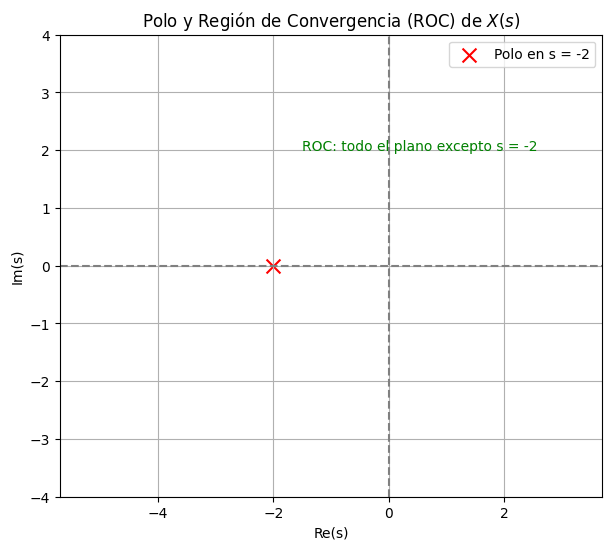

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Coordenadas del polo
polo = -2

# Crear figura
plt.figure(figsize=(7, 6))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Graficar el polo
plt.scatter([polo], [0], marker='x', s=100, color='red', label='Polo en s = -2')

# Sombrar ROC: todo excepto el punto s = -2 (lo representamos visualmente como "todo el plano")
plt.text(-1.5, 2, 'ROC: todo el plano excepto s = -2', fontsize=10, color='green')

# Configuración del gráfico
plt.title('Polo y Región de Convergencia (ROC) de $X(s)$')
plt.xlabel('Re(s)')
plt.ylabel('Im(s)')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.xlim(-6, 4)
plt.ylim(-4, 4)
plt.show()


### Funciones de Transferencia en Lazo Abierto

Encuentre la función de transferencia en lazo abierto para:

1. **Circuito RLC en serie**  
   - Entrada: tensión de alimentación  
   - Salida: tensión en el capacitor

2. **Circuito RCL en paralelo**  
   - Entrada: corriente de alimentación  
   - Salida: corriente en el inductor

📌 *Tenga en cuenta las condiciones iniciales del sistema, según el material de apoyo "Circuito RLC" y "Análisis de redes eléctricas".*


### Circuito RLC en serie – Función de transferencia

**Objetivo:** Obtener la función de transferencia del sistema

$$
H(s) = \frac{V_C(s)}{V_{\text{in}}(s)}
$$

---

#### 1. Ecuación del circuito

Aplicamos la Ley de Kirchhoff de Voltajes (KVL) al lazo:

$$
V_{\text{in}}(t) = V_R(t) + V_L(t) + V_C(t)
$$

Usando las relaciones constitutivas:

- $ V_R(t) = Ri(t) $
- $ V_L(t) = L \frac{di(t)}{dt} $
- $ V_C(t) = \frac{1}{C} \int i(t) dt $

Entonces:

$$
V_{\text{in}}(t) = Ri(t) + L \frac{di(t)}{dt} + \frac{1}{C} \int i(t) dt
$$

---

#### 2. Transformada de Laplace

Aplicamos la transformada de Laplace (condiciones iniciales nulas):

- $ \mathcal{L}\{Ri(t)\} = R I(s) $
- $ \mathcal{L}\left\{L \frac{di(t)}{dt} \right\} = L s I(s) $
- $ \mathcal{L}\left\{ \frac{1}{C} \int i(t) dt \right\} = \frac{1}{C s} I(s) $

Entonces:

$$
V_{\text{in}}(s) = \left( R + Ls + \frac{1}{Cs} \right) I(s)
$$

---

#### 3. Relación con la salida

La salida es la **tensión en el capacitor**, y sabemos que:

$$
V_C(s) = \frac{1}{Cs} I(s)
$$

---

#### 4. Función de transferencia

Queremos:

$$
H(s) = \frac{V_C(s)}{V_{\text{in}}(s)}
= \frac{\frac{1}{Cs} I(s)}{\left(R + Ls + \frac{1}{Cs} \right) I(s)}
$$

Cancelamos $I(s)$:

$$
H(s) = \frac{\frac{1}{Cs}}{R + Ls + \frac{1}{Cs}}
$$

Multiplicamos numerador y denominador por $Cs$ para simplificar:

$$
H(s) = \frac{1}{RCs + LCs^2 + 1}
$$

Finalmente:

$$
H(s) = \frac{1}{LCs^2 + RCs + 1}
$$

---

### ✅ Resultado final:

$$
\boxed{H(s) = \frac{1}{LCs^2 + RCs + 1}}
$$

Esta es la **función de transferencia** del circuito RLC en serie, con salida la tensión del capacitor y entrada la tensión de alimentación.


### Circuito RCL en paralelo – Función de transferencia

**Objetivo:** Obtener la función de transferencia del sistema

$$
H(s) = \frac{I_L(s)}{I_{\text{in}}(s)}
$$

---

#### 1. Ecuación del circuito

Dado que los elementos están en **paralelo**, la **tensión \( V(t) \)** en cada rama es la misma.

Por Ley de Kirchhoff de Corrientes (KCL):

$$
I_{\text{in}}(t) = I_R(t) + I_L(t) + I_C(t)
$$

Usamos las relaciones constitutivas:

- $ I_R(t) = \frac{V(t)}{R} $
- $ I_L(t) = \frac{1}{L} \int V(t) dt $
- $ I_C(t) = C \frac{dV(t)}{dt} $

Entonces:

$$
I_{\text{in}}(t) = \frac{V(t)}{R} + \frac{1}{L} \int V(t) dt + C \frac{dV(t)}{dt}
$$

---

#### 2. Transformada de Laplace

Aplicamos la transformada de Laplace (condiciones iniciales nulas):

- $ \mathcal{L}\left\{ \frac{V(t)}{R} \right\} = \frac{1}{R} V(s) $
- $ \mathcal{L}\left\{ \frac{1}{L} \int V(t) dt \right\} = \frac{1}{Ls} V(s) $
- $ \mathcal{L}\left\{ C \frac{dV(t)}{dt} \right\} = Cs V(s) $

Entonces:

$$
I_{\text{in}}(s) = \left( \frac{1}{R} + \frac{1}{Ls} + Cs \right) V(s)
$$

---

#### 3. Relación con la salida

La salida es la **corriente por el inductor**, que en Laplace es:

$$
I_L(s) = \frac{1}{Ls} V(s)
$$

---

#### 4. Función de transferencia

Queremos:

$$
H(s) = \frac{I_L(s)}{I_{\text{in}}(s)} =
\frac{ \frac{1}{Ls} V(s) }{ \left( \frac{1}{R} + \frac{1}{Ls} + Cs \right) V(s) }
$$

Cancelamos $V(s)$:

$$
H(s) = \frac{ \frac{1}{Ls} }{ \frac{1}{R} + \frac{1}{Ls} + Cs }
$$

Multiplicamos numerador y denominador por $Ls$ para simplificar:

$$
H(s) = \frac{1}{ \frac{Ls}{R} + 1 + LCs^2 }
$$

Finalmente:

$$
H(s) = \frac{1}{LCs^2 + \frac{L}{R}s + 1}
$$

---

### ✅ Resultado final:

$$
\boxed{H(s) = \frac{1}{LCs^2 + \frac{L}{R}s + 1}}
$$

Esta es la **función de transferencia** del circuito RCL en paralelo, con entrada la corriente total y salida la corriente en el inductor.


### Respuesta en lazo cerrado

Para las funciones de transferencia en lazo abierto encontradas en el punto anterior,  
encuentre la **expresión de la salida en el tiempo** para una configuración en **lazo cerrado** del sistema,  
en función de $R$, $L$ y $C$, para las siguientes entradas:

1. $i)$ impulso  
2. $ii)$ escalón unitario  
3. $iii)$ rampa

📌 Compruebe los resultados en simulación sobre Python (utilizando `sympy`) y **grafique la señal de salida para cada caso**.

Ver cuaderno de ayuda: *Fracciones parciales – Circuito RLC*.


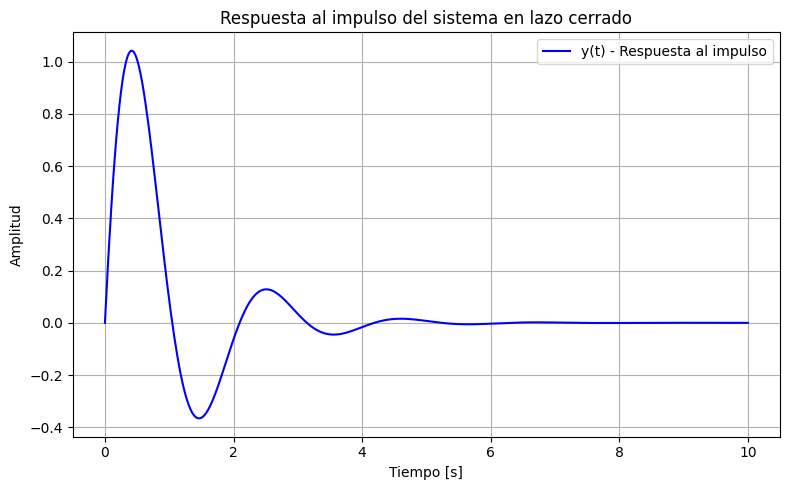

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Función de transferencia del sistema en lazo cerrado con R=2, L=1, C=0.2
# H(s) = 1 / (0.2s^2 + 0.4s + 2)
num = [1]
den = [0.2, 0.4, 2]
HRLC = ctrl.tf(num, den)

# Simulación de la respuesta al impulso
t_vals = np.linspace(0, 10, 400)
t_impulse, y_impulse = ctrl.impulse_response(HRLC, T=t_vals)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(t_impulse, y_impulse, label='y(t) - Respuesta al impulso', color='blue')
plt.title('Respuesta al impulso del sistema en lazo cerrado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Respuesta al escalón – Sistema en lazo cerrado

Recordamos la función de transferencia en lazo cerrado:

$$
H_{\text{cerrado}}(s) = \frac{1}{LCs^2 + RCs + 2}
$$

---

#### Entrada: escalón unitario

En Laplace:  
$$
U(s) = \frac{1}{s}
$$

Entonces:

$$
Y(s) = H_{\text{cerrado}}(s) \cdot U(s) = \frac{1}{s(LCs^2 + RCs + 2)}
$$

Para los valores:  
- \( R = 2 \, \Omega \)  
- \( L = 1 \, H \)  
- \( C = 0.2 \, F \)

Obtenemos:

$$
Y(s) = \frac{1}{s(s^2 + 2s + 2)}
$$

Transformada inversa:

$$
y(t) = \left(1 - e^{-t}(\cos(t) + \sin(t))\right) \cdot u(t)
$$

---

#### Gráfica de la respuesta

La siguiente figura muestra la **respuesta al escalón unitario del sistema**:

*(Ver celda de código correspondiente con `sympy` y `matplotlib`)*


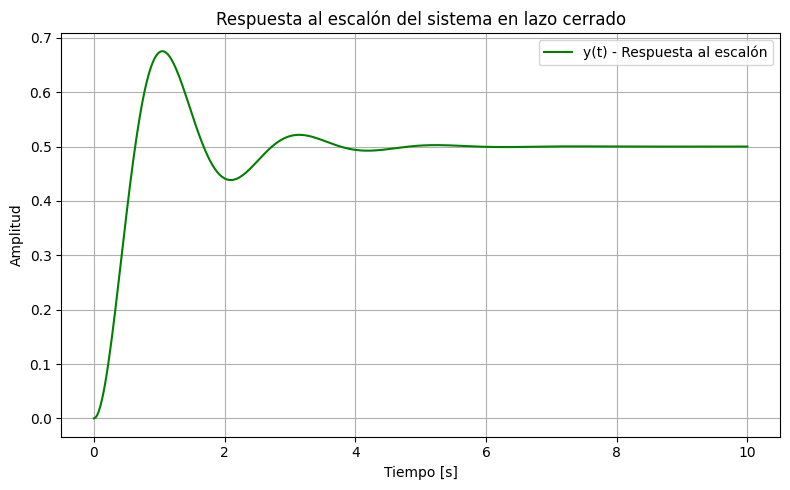

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Función de transferencia del sistema en lazo cerrado con R=2, L=1, C=0.2
# H(s) = 1 / (0.2s^2 + 0.4s + 2)
num = [1]
den = [0.2, 0.4, 2]
HRLC = ctrl.tf(num, den)

# Simulación de la respuesta al escalón
t_vals = np.linspace(0, 10, 400)
t_step, y_step = ctrl.step_response(HRLC, T=t_vals)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(t_step, y_step, label='y(t) - Respuesta al escalón', color='green')
plt.title('Respuesta al escalón del sistema en lazo cerrado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


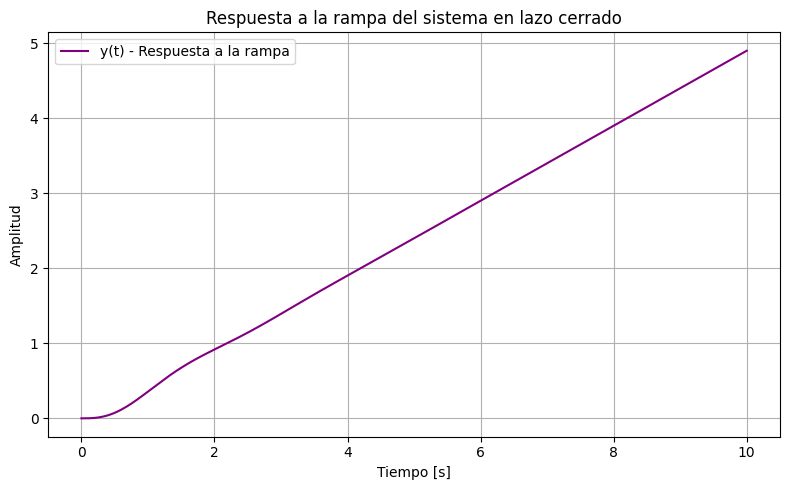

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Función de transferencia del sistema en lazo cerrado con R=2, L=1, C=0.2
# => H(s) = 1 / (0.2s^2 + 0.4s + 2)
num = [1]
den = [0.2, 0.4, 2]
HRLC = ctrl.tf(num, den)

# Entrada rampa: U(t) = t => forzamos la entrada manualmente
t_vals = np.linspace(0, 10, 400)
t_ramp, y_ramp = ctrl.forced_response(HRLC, T=t_vals, U=t_vals)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(t_ramp, y_ramp, label='y(t) - Respuesta a la rampa', color='purple')
plt.title('Respuesta a la rampa del sistema en lazo cerrado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()